# Data Preparation Pipeline
* Data Exploration
* Feature Engineering
* Data Cleaning
* Encoding & Scaling
* Saving Data

In [51]:
# Basic Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data Source

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Senior Project/Datasets/gee_test.csv")
df = df.drop(['SCAN','TRACK'], axis = 1)
df.head()

,Unnamed: 0,LATITUDE,LONGITUDE,lat_min,lat_max,long_min,long_max,ACQ_DATE,ACQ_TIME,open_time,close_time,BRIGHTNESS,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT,DAYNIGHT
0,0,6.870,100.463,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0,0
1,1,6.870,100.463,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0,0
2,2,6.870,100.463,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0,0
3,3,6.870,100.463,6.837,7.133,100.244,100.574,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0,0
4,4,6.929,100.422,6.837,7.133,100.244,100.574,02/24/2019,07:00:00,07:00:00,09:00:00,325.400,0,0.038,0.000,0.000,0.118,132,0,0


## Data Exploration & Feature Engineering

### Missing Values

In [53]:
df.isnull().values.any()

False

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    171893 non-null  int64  
 1   LATITUDE      171893 non-null  float64
 2   LONGITUDE     171893 non-null  float64
 3   lat_min       171893 non-null  float64
 4   lat_max       171893 non-null  float64
 5   long_min      171893 non-null  float64
 6   long_max      171893 non-null  float64
 7   ACQ_DATE      171893 non-null  object 
 8   ACQ_TIME      171893 non-null  object 
 9   open_time     171893 non-null  object 
 10  close_time    171893 non-null  object 
 11  BRIGHTNESS    171893 non-null  float64
 12  FireOccurred  171893 non-null  int64  
 13  CO_mol/m2     171893 non-null  float64
 14  SO2_mol/m2    171893 non-null  float64
 15  NO2_mol/m2    171893 non-null  float64
 16  O3_mol/m2     171893 non-null  float64
 17  location      171893 non-null  int64  
 18  INST

### Feature Selection

In [55]:
print("Column numbers: ", len(df.columns))

Column numbers:  20


In [56]:
df.dtypes

Unnamed: 0        int64
LATITUDE        float64
LONGITUDE       float64
lat_min         float64
lat_max         float64
long_min        float64
long_max        float64
ACQ_DATE         object
ACQ_TIME         object
open_time        object
close_time       object
BRIGHTNESS      float64
FireOccurred      int64
CO_mol/m2       float64
SO2_mol/m2      float64
NO2_mol/m2      float64
O3_mol/m2       float64
location          int64
INSTRUMENT        int64
DAYNIGHT          int64
dtype: object

In [57]:
display(df['ACQ_DATE'].value_counts())
display(df['ACQ_TIME'].value_counts())
display(df['open_time'].value_counts())
display(df['close_time'].value_counts())

04/02/2020    3542
03/11/2020    3519
03/14/2020    3269
03/29/2020    3010
01/28/2020    2856
              ... 
02/09/2021       1
06/06/2022       1
09/05/2021       1
06/16/2019       1
10/02/2022       1
Name: ACQ_DATE, Length: 927, dtype: int64

07:00:00    113220
06:00:00     56155
08:00:00      2423
05:00:00        95
Name: ACQ_TIME, dtype: int64

06:00:00    103703
05:00:00     58551
07:00:00      9639
Name: open_time, dtype: int64

07:00:00    92191
08:00:00    66777
09:00:00     9146
12:00:00     3565
13:00:00      213
11:00:00        1
Name: close_time, dtype: int64

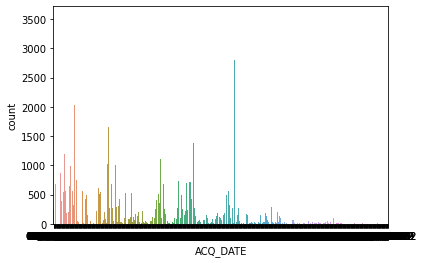

In [58]:
sb.countplot(x=df["ACQ_DATE"])

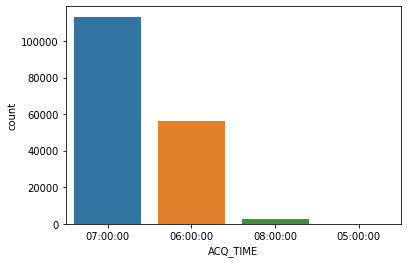

In [59]:
sb.countplot(x=df["ACQ_TIME"])

ACQ_TIME is not as evenly distributed as expected.

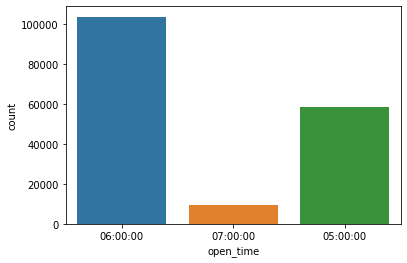

In [60]:
sb.countplot(x=df["open_time"])

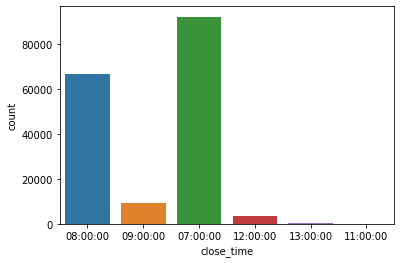

In [61]:
sb.countplot(x=df["close_time"])

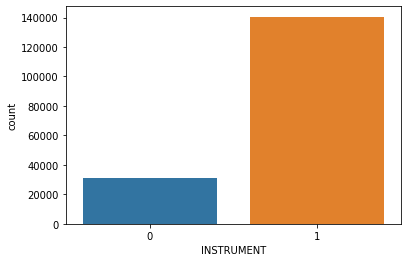

In [62]:
sb.countplot(x=df["INSTRUMENT"])

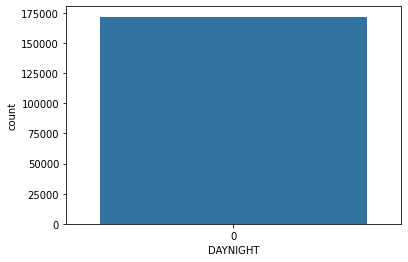

In [63]:
sb.countplot(x=df["DAYNIGHT"])

DAYNIGHT should be dropped. Redundant feature.

In [64]:
df = df.drop(['Unnamed: 0','DAYNIGHT','lat_min','lat_max','long_min','long_max'], axis = 1)
df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,open_time,close_time,BRIGHTNESS,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
0,6.870,100.463,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0
1,6.870,100.463,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0
2,6.870,100.463,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0
3,6.870,100.463,01/25/2019,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0
4,6.929,100.422,02/24/2019,07:00:00,07:00:00,09:00:00,325.400,0,0.038,0.000,0.000,0.118,132,0


lat_min, lat_max, long_min, long_max is redundant with LATITUDE and LONGTITUDE

In [65]:
print("Column numbers: ", len(df.columns))

Column numbers:  14


In [66]:
df.dtypes

LATITUDE        float64
LONGITUDE       float64
ACQ_DATE         object
ACQ_TIME         object
open_time        object
close_time       object
BRIGHTNESS      float64
FireOccurred      int64
CO_mol/m2       float64
SO2_mol/m2      float64
NO2_mol/m2      float64
O3_mol/m2       float64
location          int64
INSTRUMENT        int64
dtype: object

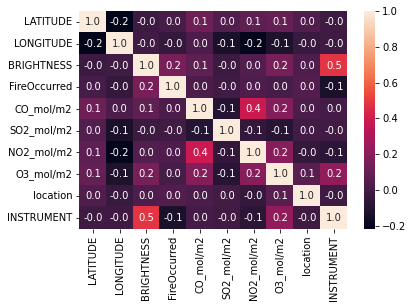

In [67]:
corrplot = sb.heatmap(df.corr(), annot=True, fmt=".1f")

Heatmap here does not check for autocorrelation of object type features yet. Will check again after encoding features.

### Seasonality

In [68]:
sorted_df = df.copy()
sorted_df['ACQ_DATE'] = pd.to_datetime(df['ACQ_DATE'])
sorted_df = sorted_df.sort_values(by='ACQ_DATE')
sorted_df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,open_time,close_time,BRIGHTNESS,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
91520,15.894,101.096,2018-11-22,07:00:00,06:00:00,08:00:00,317.500,0,0.034,0.000,0.000,0.110,70,0
110504,14.888,100.147,2018-11-22,07:00:00,06:00:00,08:00:00,313.300,0,0.036,-0.000,0.000,0.111,118,0
110503,13.903,101.059,2018-11-22,07:00:00,06:00:00,08:00:00,314.400,0,0.035,0.000,0.000,0.110,47,0
61613,15.306,104.036,2018-11-22,07:00:00,06:00:00,08:00:00,315.000,0,0.033,-0.000,0.000,0.109,506,0
91519,15.892,101.087,2018-11-22,07:00:00,06:00:00,08:00:00,318.300,0,0.034,0.000,0.000,0.110,70,0


In [69]:
sorted_df.tail()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,open_time,close_time,BRIGHTNESS,FireOccurred,CO_mol/m2,SO2_mol/m2,NO2_mol/m2,O3_mol/m2,location,INSTRUMENT
116746,17.137,100.131,2022-12-14,06:00:00,06:00:00,08:00:00,326.190,0,0.042,0.000,0.000,0.105,480,1
116745,17.134,100.129,2022-12-14,06:00:00,06:00:00,08:00:00,327.710,0,0.042,0.000,0.000,0.105,480,1
116744,17.162,100.123,2022-12-14,06:00:00,06:00:00,08:00:00,350.200,0,0.042,0.000,0.000,0.105,480,1
89648,16.462,102.255,2022-12-14,06:00:00,06:00:00,08:00:00,347.050,0,0.037,0.000,0.000,0.104,481,1
75827,17.486,100.056,2022-12-14,06:00:00,06:00:00,08:00:00,351.300,0,0.041,-0.000,0.000,0.104,645,1


In [70]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171893 entries, 91520 to 75827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LATITUDE      171893 non-null  float64       
 1   LONGITUDE     171893 non-null  float64       
 2   ACQ_DATE      171893 non-null  datetime64[ns]
 3   ACQ_TIME      171893 non-null  object        
 4   open_time     171893 non-null  object        
 5   close_time    171893 non-null  object        
 6   BRIGHTNESS    171893 non-null  float64       
 7   FireOccurred  171893 non-null  int64         
 8   CO_mol/m2     171893 non-null  float64       
 9   SO2_mol/m2    171893 non-null  float64       
 10  NO2_mol/m2    171893 non-null  float64       
 11  O3_mol/m2     171893 non-null  float64       
 12  location      171893 non-null  int64         
 13  INSTRUMENT    171893 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usag

In [71]:
ts_data = sorted_df[['ACQ_DATE','FireOccurred']]
ts_data = ts_data.loc[ts_data['FireOccurred'] == 1].drop_duplicates().sort_values(by='ACQ_DATE')
ts_data.head()

,ACQ_DATE,FireOccurred
117870,2018-12-05,1
143221,2018-12-23,1
42025,2018-12-24,1
61638,2019-01-02,1
152409,2019-01-06,1


In [72]:
ts_data.tail()

,ACQ_DATE,FireOccurred
141800,2022-03-20,1
21025,2022-03-28,1
142131,2022-03-30,1
142198,2022-04-02,1
102994,2022-04-28,1


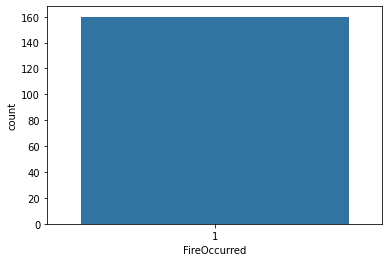

In [73]:
sb.countplot(x=ts_data["FireOccurred"])

In [74]:
ts_data = (ts_data.set_index('ACQ_DATE')
      .reindex(pd.date_range('2018-11-22', '2022-12-14', freq='D'))
      .rename_axis(['ACQ_DATE'])
      .fillna(0)
      .reset_index()).sort_values(by='ACQ_DATE')
ts_data.head()

,ACQ_DATE,FireOccurred
0,2018-11-22,0.000
1,2018-11-23,0.000
2,2018-11-24,0.000
3,2018-11-25,0.000
4,2018-11-26,0.000


In [75]:
ts_data.tail()

,ACQ_DATE,FireOccurred
1479,2022-12-10,0.000
1480,2022-12-11,0.000
1481,2022-12-12,0.000
1482,2022-12-13,0.000
1483,2022-12-14,0.000


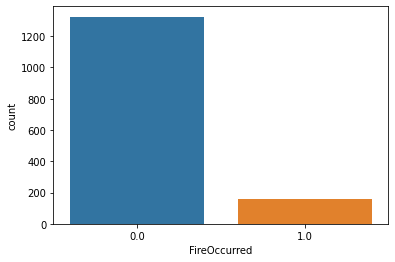

In [76]:
sb.countplot(x=ts_data["FireOccurred"])

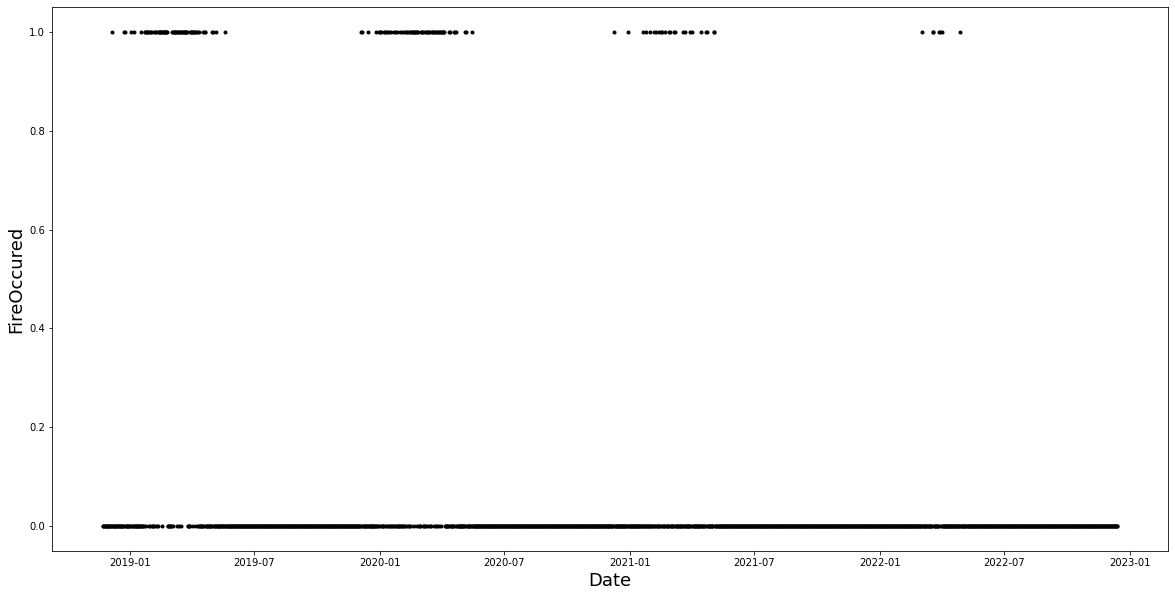

In [77]:
plt.figure(figsize=(20, 10))
plt.plot(ts_data['ACQ_DATE'], ts_data['FireOccurred'], color = "black", linestyle="None", marker='.')
plt.ylabel("FireOccured", fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.show()

More forest fire occurs during the dry season from November to May

(Rainy season is from June to October)

In [78]:
def mapfunc(row):
    if 6 <= row['ACQ_DATE'].month <= 10: # Rainy season
      var = 0
    else:
      var = 1
    return var

ts_data['DRY_SEASON'] = ts_data.apply(mapfunc, axis=1)

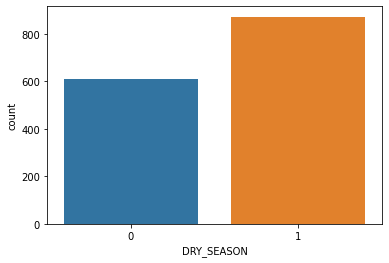

In [79]:
sb.countplot(x=ts_data["DRY_SEASON"])

In [80]:
ts_data.head()

,ACQ_DATE,FireOccurred,DRY_SEASON
0,2018-11-22,0.000,1
1,2018-11-23,0.000,1
2,2018-11-24,0.000,1
3,2018-11-25,0.000,1
4,2018-11-26,0.000,1


In [81]:
ts_data.loc[(ts_data['FireOccurred'] == 1) & (ts_data['DRY_SEASON'] == 0)]

,ACQ_DATE,FireOccurred,DRY_SEASON


None.

Showing that the range of dry and rainy season as well as the implementation is correct.

In [82]:
df['ACQ_DATE'] = pd.to_datetime(df['ACQ_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171893 entries, 0 to 171892
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   LATITUDE      171893 non-null  float64       
 1   LONGITUDE     171893 non-null  float64       
 2   ACQ_DATE      171893 non-null  datetime64[ns]
 3   ACQ_TIME      171893 non-null  object        
 4   open_time     171893 non-null  object        
 5   close_time    171893 non-null  object        
 6   BRIGHTNESS    171893 non-null  float64       
 7   FireOccurred  171893 non-null  int64         
 8   CO_mol/m2     171893 non-null  float64       
 9   SO2_mol/m2    171893 non-null  float64       
 10  NO2_mol/m2    171893 non-null  float64       
 11  O3_mol/m2     171893 non-null  float64       
 12  location      171893 non-null  int64         
 13  INSTRUMENT    171893 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(3), object(3)
memory usage: 

In [83]:
dry = 0
rainy = 0

for i in range(len(df['ACQ_DATE'])):
  if 6 <= df['ACQ_DATE'][i].month <= 10:
    rainy +=1
  else:
    dry += 1

print(rainy)
print(dry)

4746
167147


Most measurements were taken during the dry season

In [84]:
df = pd.merge(df, ts_data, on="ACQ_DATE", how="left")
df = df.drop(['FireOccurred_y'], axis = 1)
df.rename(columns = {'open_time':'OPEN_TIME', 
                           'close_time':'CLOSE_TIME', 
                           'FireOccurred_x':'FIRE_OCCURRED',
                           'CO_mol/m2':'CO_MOL/M2',
                           'SO2_mol/m2':'SO2_MOL/M2',
                           'NO2_mol/m2':'NO2_MOL/M2',
                           'O3_mol/m2':'O3_MOL/M2',
                           'location':'LOCATION'
                           }, inplace = True)

print("Column numbers: ", len(df.columns))
df.head()

Column numbers:  15


,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
0,6.870,100.463,2019-01-25,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
1,6.870,100.463,2019-01-25,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
2,6.870,100.463,2019-01-25,07:00:00,06:00:00,08:00:00,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
3,6.870,100.463,2019-01-25,07:00:00,06:00:00,08:00:00,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
4,6.929,100.422,2019-02-24,07:00:00,07:00:00,09:00:00,325.400,0,0.038,0.000,0.000,0.118,132,0,1


## Encoder

Encode categorial data ( ACQ_DATE , ACQ_TIME , OPEN_TIME , CLOSE_TIME ) using OrdinalEncoder

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171893 entries, 0 to 171892
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LATITUDE       171893 non-null  float64       
 1   LONGITUDE      171893 non-null  float64       
 2   ACQ_DATE       171893 non-null  datetime64[ns]
 3   ACQ_TIME       171893 non-null  object        
 4   OPEN_TIME      171893 non-null  object        
 5   CLOSE_TIME     171893 non-null  object        
 6   BRIGHTNESS     171893 non-null  float64       
 7   FIRE_OCCURRED  171893 non-null  int64         
 8   CO_MOL/M2      171893 non-null  float64       
 9   SO2_MOL/M2     171893 non-null  float64       
 10  NO2_MOL/M2     171893 non-null  float64       
 11  O3_MOL/M2      171893 non-null  float64       
 12  LOCATION       171893 non-null  int64         
 13  INSTRUMENT     171893 non-null  int64         
 14  DRY_SEASON     171893 non-null  int64         
dtype

In [86]:
display(df['FIRE_OCCURRED'].value_counts())

0    170544
1      1349
Name: FIRE_OCCURRED, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

labelEncoder = LabelEncoder()
ordinalEncoder = OrdinalEncoder()

df[['ACQ_DATE','ACQ_TIME','OPEN_TIME','CLOSE_TIME']] = ordinalEncoder.fit_transform(df[['ACQ_DATE','ACQ_TIME','OPEN_TIME','CLOSE_TIME']])
df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
0,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
1,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
2,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
3,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
4,6.929,100.422,76.000,2.000,2.000,2.000,325.400,0,0.038,0.000,0.000,0.118,132,0,1


## Autocorrelation of Features

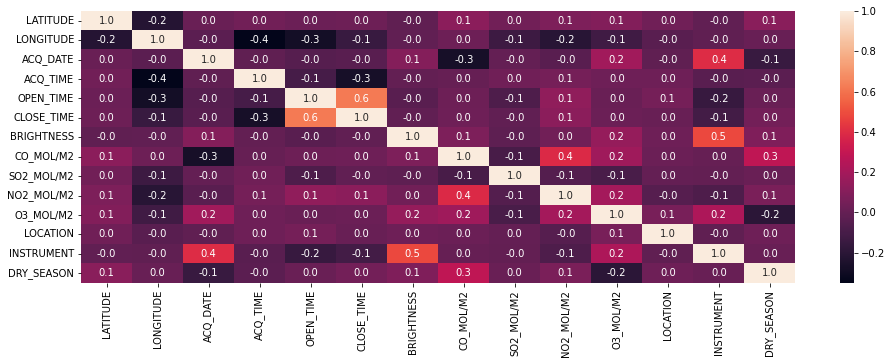

In [88]:
plt.figure(figsize = (16,5))
dataplot = sb.heatmap(df.drop('FIRE_OCCURRED', axis=1).corr(), annot=True, fmt=".1f")
plt.show()

No highly autocorrelated features. No more needs to be dropped to avoid multicollinearity

In [89]:
df.drop('FIRE_OCCURRED', axis=1).describe()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
count,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000
mean,16.596,100.802,414.423,1.686,0.715,0.584,337.136,0.051,0.000,0.000,0.116,360.176,0.818,0.972
std,1.779,1.924,196.327,0.495,0.562,0.789,10.280,0.013,0.000,0.000,0.006,196.859,0.386,0.164
min,5.698,97.638,0.000,0.000,0.000,0.000,207.900,0.019,-0.001,0.000,0.099,0.000,0.000,0.000
25%,15.500,99.293,281.000,1.000,0.000,0.000,331.800,0.042,-0.000,0.000,0.111,211.000,1.000,1.000
50%,16.806,100.492,333.000,2.000,1.000,0.000,336.400,0.049,0.000,0.000,0.115,343.000,1.000,1.000
75%,17.804,102.109,542.000,2.000,1.000,1.000,342.000,0.057,0.000,0.000,0.120,538.000,1.000,1.000
max,20.430,105.565,926.000,3.000,2.000,5.000,502.300,0.144,0.004,0.001,0.134,688.000,1.000,1.000


## Scaler

Apply StandardScaler to non-binary features (labels and binary features are excluded)

Standardizing binary variables makes interpretation of binary variables vague as it cannot be increased by  a standard deviation

In [90]:
df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
0,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
1,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
2,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.050,-0.000,0.000,0.113,132,0,1
3,6.870,100.463,48.000,2.000,1.000,1.000,314.200,0,0.052,-0.000,0.000,0.113,132,0,1
4,6.929,100.422,76.000,2.000,2.000,2.000,325.400,0,0.038,0.000,0.000,0.118,132,0,1


In [91]:
df.describe()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
count,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000
mean,16.596,100.802,414.423,1.686,0.715,0.584,337.136,0.008,0.051,0.000,0.000,0.116,360.176,0.818,0.972
std,1.779,1.924,196.327,0.495,0.562,0.789,10.280,0.088,0.013,0.000,0.000,0.006,196.859,0.386,0.164
min,5.698,97.638,0.000,0.000,0.000,0.000,207.900,0.000,0.019,-0.001,0.000,0.099,0.000,0.000,0.000
25%,15.500,99.293,281.000,1.000,0.000,0.000,331.800,0.000,0.042,-0.000,0.000,0.111,211.000,1.000,1.000
50%,16.806,100.492,333.000,2.000,1.000,0.000,336.400,0.000,0.049,0.000,0.000,0.115,343.000,1.000,1.000
75%,17.804,102.109,542.000,2.000,1.000,1.000,342.000,0.000,0.057,0.000,0.000,0.120,538.000,1.000,1.000
max,20.430,105.565,926.000,3.000,2.000,5.000,502.300,1.000,0.144,0.004,0.001,0.134,688.000,1.000,1.000


In [92]:
display(df['INSTRUMENT'].value_counts())
display(df['DRY_SEASON'].value_counts())

1    140536
0     31357
Name: INSTRUMENT, dtype: int64

1    167147
0      4746
Name: DRY_SEASON, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
df[['LATITUDE','LONGITUDE','ACQ_DATE','ACQ_TIME','OPEN_TIME','CLOSE_TIME','BRIGHTNESS','CO_MOL/M2','SO2_MOL/M2','NO2_MOL/M2','O3_MOL/M2','LOCATION']] = pd.DataFrame(standardScaler.fit_transform(df[['LATITUDE','LONGITUDE','ACQ_DATE','ACQ_TIME','OPEN_TIME','CLOSE_TIME','BRIGHTNESS','CO_MOL/M2','SO2_MOL/M2','NO2_MOL/M2','O3_MOL/M2','LOCATION']]), 
                                                                                                                                                                     columns = df[['LATITUDE','LONGITUDE','ACQ_DATE','ACQ_TIME','OPEN_TIME','CLOSE_TIME','BRIGHTNESS','CO_MOL/M2','SO2_MOL/M2','NO2_MOL/M2','O3_MOL/M2','LOCATION']].columns)
df.head()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
0,-5.466,-0.176,-1.866,0.634,0.506,0.527,-2.231,0,-0.024,-0.474,-1.152,-0.511,-1.159,0,1
1,-5.466,-0.176,-1.866,0.634,0.506,0.527,-2.231,0,0.114,-0.474,-1.152,-0.511,-1.159,0,1
2,-5.466,-0.176,-1.866,0.634,0.506,0.527,-2.231,0,-0.024,-0.474,-1.361,-0.511,-1.159,0,1
3,-5.466,-0.176,-1.866,0.634,0.506,0.527,-2.231,0,0.114,-0.474,-1.361,-0.511,-1.159,0,1
4,-5.433,-0.197,-1.724,0.634,2.286,1.794,-1.142,0,-0.968,0.340,-1.252,0.426,-1.159,0,1


In [94]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME,OPEN_TIME,CLOSE_TIME,BRIGHTNESS,FIRE_OCCURRED,CO_MOL/M2,SO2_MOL/M2,NO2_MOL/M2,O3_MOL/M2,LOCATION,INSTRUMENT,DRY_SEASON
count,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000,171893.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.008,-0.000,0.000,0.000,0.000,-0.000,0.818,0.972
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.088,1.000,1.000,1.000,1.000,1.000,0.386,0.164
min,-6.125,-1.644,-2.111,-3.410,-1.273,-0.740,-12.571,0.000,-2.452,-4.545,-2.509,-2.785,-1.830,0.000,0.000
25%,-0.616,-0.784,-0.680,-1.388,-1.273,-0.740,-0.519,0.000,-0.665,-0.538,-0.681,-0.725,-0.758,1.000,1.000
50%,0.118,-0.161,-0.415,0.634,0.506,-0.740,-0.072,0.000,-0.145,-0.121,-0.171,-0.047,-0.087,1.000,1.000
75%,0.679,0.680,0.650,0.634,0.506,0.527,0.473,0.000,0.482,0.368,0.460,0.729,0.903,1.000,1.000
max,2.155,2.476,2.606,2.656,2.286,5.595,16.066,1.000,7.151,18.704,25.248,3.045,1.665,1.000,1.000


In [95]:
standardScaler.mean_

array([1.65959997e+01, 1.00801777e+02, 4.14422891e+02, 1.68630485e+00,
       7.15450891e-01, 5.84066832e-01, 3.37136092e+02, 5.07095626e-02,
       3.30197589e-05, 6.83942895e-05, 1.15671136e-01, 3.60176110e+02])

In [96]:
standardScaler.var_

array([3.16560465e+00, 3.70177214e+00, 3.85442469e+04, 2.44587797e-01,
       3.15732077e-01, 6.23041324e-01, 1.05684013e+02, 1.71001030e-04,
       4.59691726e-08, 3.17180952e-10, 3.74751000e-05, 3.87533601e+04])

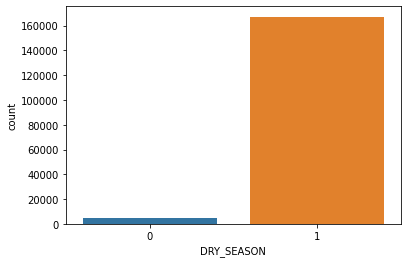

In [97]:
sb.countplot(x=df["DRY_SEASON"])

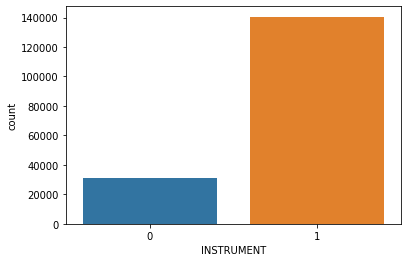

In [98]:
sb.countplot(x=df["INSTRUMENT"])

## Saving Data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171893 entries, 0 to 171892
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LATITUDE       171893 non-null  float64
 1   LONGITUDE      171893 non-null  float64
 2   ACQ_DATE       171893 non-null  float64
 3   ACQ_TIME       171893 non-null  float64
 4   OPEN_TIME      171893 non-null  float64
 5   CLOSE_TIME     171893 non-null  float64
 6   BRIGHTNESS     171893 non-null  float64
 7   FIRE_OCCURRED  171893 non-null  int64  
 8   CO_MOL/M2      171893 non-null  float64
 9   SO2_MOL/M2     171893 non-null  float64
 10  NO2_MOL/M2     171893 non-null  float64
 11  O3_MOL/M2      171893 non-null  float64
 12  LOCATION       171893 non-null  float64
 13  INSTRUMENT     171893 non-null  int64  
 14  DRY_SEASON     171893 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 25.0 MB


In [ ]:
df.to_csv('cleaned_gee_data.csv')
!cp cleaned_gee_data.csv "drive/My Drive/Senior Project/Datasets/"